**Collins Kibet**

Spring 2021

CS 251: Data Analysis and Visualization

Project 3: Linear Regression - Extensions

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted. I changed the first column with all the 7 kinds of fish into a numerical column with categories for each group of fish. I replaced them as follows: Bream - 0, Roach - 1, Whitefish - 2, Parkki - 3, Perch - 4, Pike - 5, Smelt - 6. I got the dataset from kaggle (https://www.kaggle.com/aungpyaeap/fish-market)

In [2]:
#Import Transformation, Data and Analysis classes from respective files
from data import Data
from linear_regression import LinearRegression
from analysis import Analysis

#Make iris data object
filename = 'data/fish_csv'
fish_data = Data(filename)
print(fish_data)

#normalize
fish_data.

--------------------------------
data/fish_csv (159x7) 
Headers: 
﻿Species    Weight    Vertical_len    Diagonal_len    Cross_len    Height    Width
-------------------------------
Showing first 5/159 rows.
  0.0 242.0  23.2  25.4  30.0 11.52  4.02
  0.0 290.0  24.0  26.3  31.2 12.48 4.3056
  0.0 340.0  23.9  26.5  31.1 12.3778 4.6961
  0.0 363.0  26.3  29.0  33.5 12.73 4.4555
  0.0 430.0  26.5  29.0  34.0 12.444 5.134
-------------------------------



# 1 Performing Linear Regression

#Hypothesis: There is a relationship between the weight of a fish and it's height.
#Procedure:
1. Create a LinearRegression object
2. Call linear_regression function with Weight as independent variable and Height as dependent variable.
3. Perform a simple linear regression and observe r_squared value and mean squared value to see how much height canexplain weight of fish
4. Plot a scatter plot to visualize the linear regression performed above.

R^2:  0.52
MSSE:  8.68


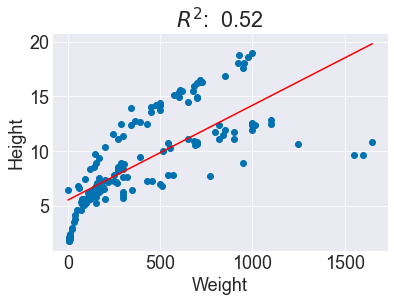

In [14]:
#create a linear regression object
lin_reg = linear_regression.LinearRegression(fish_data)

#Perform simple linear regression with weight as independent variable and height as dependent variable
lin_reg.linear_regression(['Weight'], 'Height')

#R^2 and mean_sse
print(f'R^2: {lin_reg.R2: 0.2f}')
print(f'MSSE: {lin_reg.m_sse: 0.2f}')

#Visualize linear regression
lin_reg.scatter('Weight', 'Height', f'$R^2$: {lin_reg.R2: 0.2f}')
lin_reg.show()

#Results

$R^2$ = 0.52 and MSSE  = 8.68

The mean squared error is very small at 8.68 while the $R^2$ value is 0.52 indicating that height explains about 52% of the variance in weight. The relationship is not strong because of the small $R^2$ value.

# 2. Performing Polynomial Regression
Also, the scatter plot indicates that the relationship between weight and height might not be linear. I will investigate the nature of the relationship using the polynomial_regression function.


R^2:  0.73
MSSE:  4.88


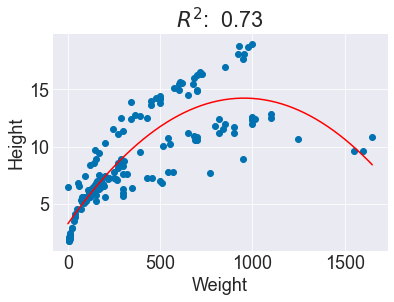

In [15]:
#perform polynomial regression with p = 2
lin_reg.poly_regression('Weight', 'Height', 2)

#R^2 and mean_sse
print(f'R^2: {lin_reg.R2: 0.2f}')
print(f'MSSE: {lin_reg.m_sse: 0.2f}')

#Visualize linear regression with p = 2
lin_reg.scatter('Weight', 'Height', f'$R^2$: {lin_reg.R2: 0.2f}')
lin_reg.show()

#Results (very surprising)

$R^2$ = 0.73 and MSSE  = 4.88

The mean squared error is decreased further to 4.88 while the $R^2$ value increased from 0.52 to 0.73 indicating that height explains about 73% of the variance in weight using degree 2 polynomial. The relationship is stronger between weight and height is stronger at p = 2 than at p = 1.

The scatter plot indicates the right shape of the data. It was surprising how the results drastically improved after running the regression with polynomial degree 2. In the cells below I can explore how the results will change with p > 2.


# 3. Investigating overfitting

Split data into training and validation set:

- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.


In [21]:
#Training set - poly_data used to fit and set
fit_set = Data('data/fish_csv')


#limit fit data to first half
fit_set.limit_samples(0,50)

print(fit_set)

#Validation set/ Testing data object
validation_set = Data('data/fish_csv')

#limit validation set data to bottom half
validation_set.limit_samples(50,100)

print(validation_set)


--------------------------------
data/fish_csv (50x7) 
Headers: 
﻿Species    Weight    Vertical_len    Diagonal_len    Cross_len    Height    Width
-------------------------------
Showing first 5/50 rows.
  0.0 242.0  23.2  25.4  30.0 11.52  4.02
  0.0 290.0  24.0  26.3  31.2 12.48 4.3056
  0.0 340.0  23.9  26.5  31.1 12.3778 4.6961
  0.0 363.0  26.3  29.0  33.5 12.73 4.4555
  0.0 430.0  26.5  29.0  34.0 12.444 5.134
-------------------------------

--------------------------------
data/fish_csv (50x7) 
Headers: 
﻿Species    Weight    Vertical_len    Diagonal_len    Cross_len    Height    Width
-------------------------------
Showing first 5/50 rows.
  1.0 200.0  22.1  23.5  26.8 7.3968 4.1272
  1.0 180.0  23.6  25.2  27.9 7.0866 3.906
  1.0 290.0  24.0  26.0  29.2 8.8768 4.4968
  1.0 272.0  25.0  27.0  30.6 8.568 4.7736
  1.0 390.0  29.5  31.7  35.0 9.485 5.355
-------------------------------



Train set R2:  0.91


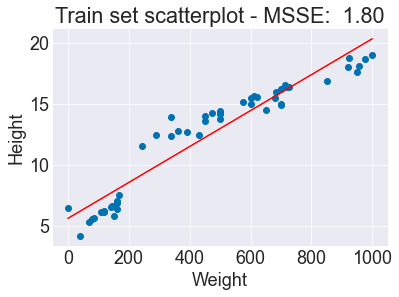

Test set R2:  0.07


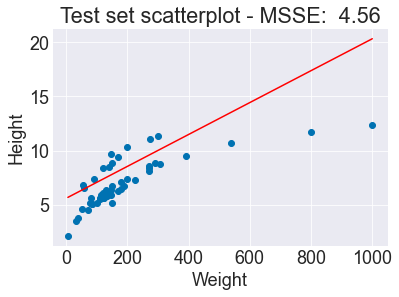

In [34]:
#Create linear regression object
linreg_train = LinearRegression(train_data)

#Fit a polynomial regression model with p = 7 on fit set
linreg_train.poly_regression('Weight', 'Height', 8)

#Scatter plot1 - fit set with regression curve
linreg_train.scatter('Weight', 'Height', f'Train set scatterplot - MSSE: {linreg_train.m_sse: 0.2f}')

print(f'Train set R2: {linreg_train.R2: 0.2f}')

linreg_train.show()

#Scatter plot2 - validation set with regression curve
#Create linear regression object for validation set
linreg_test = LinearRegression(test_data)

linreg_test.initialize('Weight', 'Height', linreg_train.get_fitted_slope(), linreg_train.get_fitted_intercept(), 8)

linreg_test.scatter('Weight', 'Height', f'Test set scatterplot - MSSE: {linreg_test.m_sse: 0.2f}' )

print(f'Test set R2: {linreg_test.R2: 0.2f}')

linreg_test.show()


**Question**:

Investigate how model performs on testing set from p = 1 to p = 8.

**Answer**:

#Degree <->  MSSE       <->      R2
#. <->     Train,Test    <->   Train,Test
#P1 :   1.80, 4.56    <->  0.91, 0.07
#P2 :   0.96, 3.32    <->  0.96, 0.32
#P3 :   0.82, 3.55    <->  0.96, 0.27
#P4 :   0.60, 3.66    <->  0.97, 0.25
#P5 :   0.41, 3.79    <->  0.98, 0.22
#P6 :   1.95, 7.61    <->  0.90, -0.56
#P7 :   4.72, 14.74   <->  0.76, -2.02
#P8 :   9.62, 24.56   <->  0.52, -4.03

We see that the model gradually gets worse as p increases from 2 to 8. The $R^2$ values from p = 6 to p = 8 of the validation set are all negative indicating that the model is not doing well at predicting data it hasn't seen before. The mean squared errors of the validation sets increase as p goes from 2 to 8. We can deduce that overfitting affects the model as the degree of polynomial used for modelling increases from 2 to 8. The model at p = 1 is worse than the model at p = 2 because a linear fit doesn't fit the data well

**Conclusion**

The model with p = 2 produces the best results. It has the highest validation set $R^2$ value and the lowest validation set mean squared error. Therefore, based on this data, the best model for running a linear regression with Weight of fish as the independent variable and Height of fish as the dependent variable is the one with a polynomial of degree of 2.
